## 소비자 - 소상공인 증감률 비교(2020.1월 기준)
#### 자료 : [소비자 배달외식 지출건수], [소비자 배달외식 지출금액], [소상공인 배달외식 매출건수], [소상공인 배달외식 매출금액]

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 데이터 불러오기

In [5]:
# 소비자 배달 지출건수 데이터

consumer_count = pd.read_csv('C:/Users/user/Desktop/230303_자료/소비자 배달외식 지출건수.csv')

# 소비자 배달 지출금액 데이터

consumer_price = pd.read_csv("C:/Users/user/Desktop/230303_자료/소비자 배달외식 지출금액.csv")

# 소상공인 배달 매출건수 데이터

small_count = pd.read_csv("C:/Users/user/Desktop/230303_자료/소상공인 배달외식 매출건수.csv")

# 소상공인 배달 매출금액 데이터

small_price = pd.read_csv("C:/Users/user/Desktop/230303_자료/소상공인 배달외식 매출금액.csv")


In [6]:
# 소비자 - 소상공인 (전국) 건수 비교

consumer_count

,Date,대한민국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2020-01-10,-0.006436,-0.001965,-0.006277,-0.011440,-0.008048,0.011042,0.001116,-0.005128,-0.009008,-0.011386,0.006176,-0.002142,-0.014431,0.009612,0.007040,-0.017601,-0.015770,-0.031121
1,2020-01-17,0.006534,0.013558,-0.002068,0.006310,0.007640,0.021162,0.004852,-0.009426,0.006518,0.002988,0.002588,0.010357,0.001516,0.011906,0.010389,0.005956,-0.001388,-0.010074
2,2020-01-24,0.006579,0.005004,0.026013,0.023299,0.004087,-0.004194,0.010674,0.033424,-0.004321,0.001245,-0.004941,-0.001931,0.007986,-0.015545,-0.016571,0.016611,0.018708,0.013851
3,2020-01-31,-0.006677,-0.016597,-0.017669,-0.018169,-0.003679,-0.028010,-0.016642,-0.018869,0.006811,0.007153,-0.003823,-0.006284,0.004929,-0.005973,-0.000859,-0.004966,-0.001549,0.027343
4,2020-02-07,0.251019,0.249492,0.184462,0.213984,0.253959,0.305906,0.228907,0.204305,0.376492,0.288435,0.239148,0.248420,0.262378,0.254935,0.226496,0.209666,0.202366,0.263717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2022-09-02,2.240431,2.369109,2.055110,1.604008,1.881977,2.016789,1.882733,1.931931,3.038081,2.430665,2.434184,1.968895,2.435275,2.412444,2.582296,1.713843,2.397180,3.525274
139,2022-09-09,2.119018,2.225642,1.892114,1.557639,1.796330,1.922956,1.762360,1.837113,2.818089,2.297657,2.343960,1.886708,2.336993,2.320359,2.385936,1.703339,2.289572,3.018708
140,2022-09-16,1.868223,1.989111,1.581528,1.250344,1.583816,1.642448,1.518121,1.498868,2.571146,2.071297,2.080873,1.677714,2.117350,2.022665,2.123980,1.397070,1.938211,2.933621
141,2022-09-23,2.060075,2.156097,1.829276,1.438715,1.735887,1.912231,1.729319,1.746528,2.876089,2.263466,2.274791,1.842052,2.258633,2.281041,2.393492,1.598992,2.145368,3.215327


In [7]:
# 소상공인은 10월 28일까지 있으므로 9월 30일까지만 필터
small_count = small_count[small_count['Date'] <= '2022-09-30']

In [8]:
small_count

,Date,대한민국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2020-01-10,NaN,0.025745,-0.002170,-0.014312,0.019023,0.021676,0.024877,-0.004292,0.038046,0.009565,NaN,0.016454,0.003524,0.012391,0.003158,-0.010991,0.011467,-0.014981
1,2020-01-17,0.016796,0.033701,0.001836,0.004746,0.012853,0.001651,0.012997,0.005986,0.033240,0.013164,-0.010110,0.014348,0.001326,-0.016163,-0.034943,-0.001279,-0.005139,0.017689
2,2020-01-24,0.011867,0.004344,0.024351,0.024528,-0.001175,-0.011261,-0.003133,0.053242,-0.041707,0.003496,0.019712,0.001216,0.012677,0.000123,0.007761,0.020673,0.013801,0.004720
3,2020-01-31,-0.028664,-0.063790,-0.024017,-0.014963,-0.030700,-0.012066,-0.034740,-0.054936,-0.029578,-0.026226,-0.009602,-0.032018,-0.017528,0.003649,0.024024,-0.008403,-0.020128,-0.007429
4,2020-02-07,0.113027,0.111675,0.055153,0.074892,0.126033,0.129095,0.103015,0.096364,0.149036,0.130584,0.146917,0.089935,0.117842,0.109090,0.148147,0.095237,0.063591,0.064560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2022-09-02,1.561854,1.110114,1.474068,0.900062,1.451347,1.500914,1.539717,1.400241,1.979347,1.650481,2.461999,1.820090,1.871869,2.367106,3.305320,1.740613,2.289946,3.221958
139,2022-09-09,1.541810,1.096295,1.388776,0.913382,1.454044,1.545426,1.519594,1.357148,1.913210,1.625673,2.498323,1.838309,1.845833,2.367211,3.168923,1.807146,2.264565,2.725180
140,2022-09-16,1.367843,0.934770,1.229348,0.764328,1.287940,1.392316,1.321450,1.148429,1.580697,1.472003,2.164945,1.618381,1.660969,2.093543,3.044596,1.551055,2.042514,2.890006
141,2022-09-23,1.460524,1.053803,1.301395,0.820020,1.347526,1.459605,1.456360,1.259880,1.940786,1.553082,2.292405,1.719897,1.749214,2.227575,3.098654,1.649116,2.100262,2.967741


### 상관계수 구하기

In [127]:
# 소비자 - 소상공인 건수 간의 상관계수 구하기
for i in range(18):
    a = pd.concat( [ consumer_count.iloc[:,i+1], small_count.iloc[:,i+1] ], axis=1).corr()
    print(a)

       대한민국   대한민국
대한민국  1.000  0.943
대한민국  0.943  1.000
          서울특별시     서울특별시
서울특별시  1.000000  0.923574
서울특별시  0.923574  1.000000
          부산광역시     부산광역시
부산광역시  1.000000  0.932271
부산광역시  0.932271  1.000000
          대구광역시     대구광역시
대구광역시  1.000000  0.888753
대구광역시  0.888753  1.000000
          인천광역시     인천광역시
인천광역시  1.000000  0.937099
인천광역시  0.937099  1.000000
          광주광역시     광주광역시
광주광역시  1.000000  0.945232
광주광역시  0.945232  1.000000
          대전광역시     대전광역시
대전광역시  1.000000  0.939601
대전광역시  0.939601  1.000000
          울산광역시     울산광역시
울산광역시  1.000000  0.915711
울산광역시  0.915711  1.000000
          세종특별자치시   세종특별자치시
세종특별자치시  1.000000  0.904819
세종특별자치시  0.904819  1.000000
          경기도       경기도
경기도  1.000000  0.945499
경기도  0.945499  1.000000
          강원도       강원도
강원도  1.000000  0.961138
강원도  0.961138  1.000000
          충청북도      충청북도
충청북도  1.000000  0.958886
충청북도  0.958886  1.000000
          충청남도      충청남도
충청남도  1.000000  0.941506
충청남도  0.941506  1.000000
          전라북도     

In [128]:
# 소비자 - 소상공인 금액 간의 상관계수 구하기
for i in range(18):
    a = pd.concat( [ consumer_price.iloc[:,i+1], small_price.iloc[:,i+1] ], axis=1).corr()
    print(a)

          대한민국      대한민국
대한민국  1.000000  0.951217
대한민국  0.951217  1.000000
          서울특별시     서울특별시
서울특별시  1.000000  0.923812
서울특별시  0.923812  1.000000
          부산광역시     부산광역시
부산광역시  1.000000  0.946948
부산광역시  0.946948  1.000000
         대구광역시    대구광역시
대구광역시  1.00000  0.91593
대구광역시  0.91593  1.00000
          인천광역시     인천광역시
인천광역시  1.000000  0.945595
인천광역시  0.945595  1.000000
          광주광역시     광주광역시
광주광역시  1.000000  0.957947
광주광역시  0.957947  1.000000
          대전광역시     대전광역시
대전광역시  1.000000  0.953918
대전광역시  0.953918  1.000000
          울산광역시     울산광역시
울산광역시  1.000000  0.934336
울산광역시  0.934336  1.000000
          세종특별자치시   세종특별자치시
세종특별자치시  1.000000  0.924717
세종특별자치시  0.924717  1.000000
          경기도       경기도
경기도  1.000000  0.953146
경기도  0.953146  1.000000
          강원도       강원도
강원도  1.000000  0.968179
강원도  0.968179  1.000000
          충청북도      충청북도
충청북도  1.000000  0.966471
충청북도  0.966471  1.000000
          충청남도      충청남도
충청남도  1.000000  0.953588
충청남도  0.953588  1.000000
       

## 전국, 지역별 소비자 - 소상공인 그래프 그리기

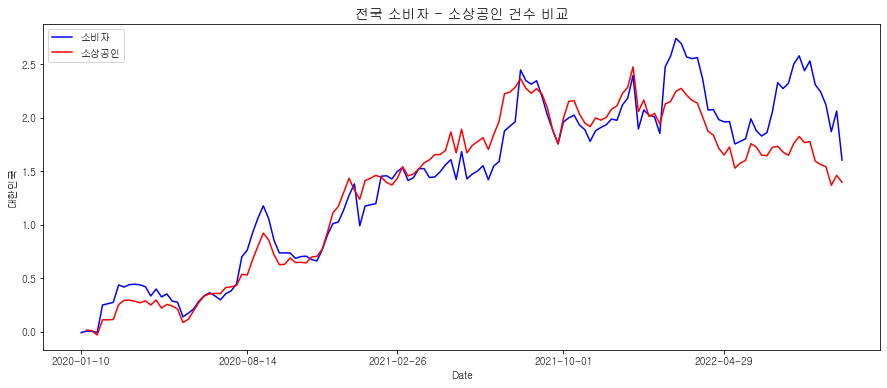

In [9]:
# 전국 소비자 - 소상공인 건수 비교

fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '대한민국', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '대한민국', color = 'red', ax=ax, data = small_count)

plt.title('전국 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

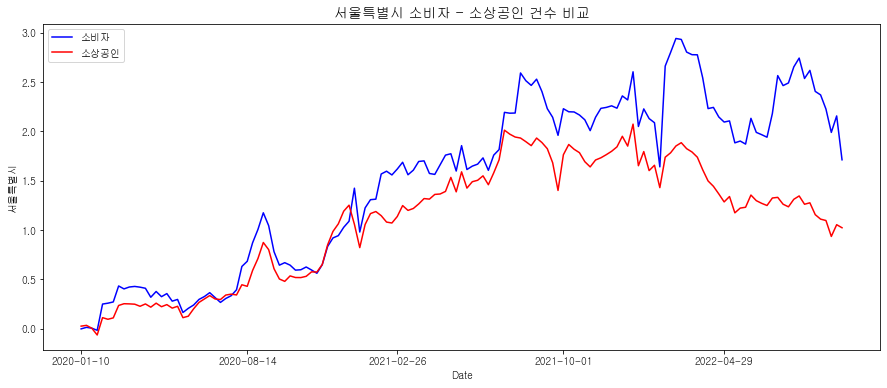

In [11]:
# 서울특별시 소비자 - 소상공인 건수 비교

fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '서울특별시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '서울특별시', color = 'red', ax=ax, data = small_count)

plt.title('서울특별시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

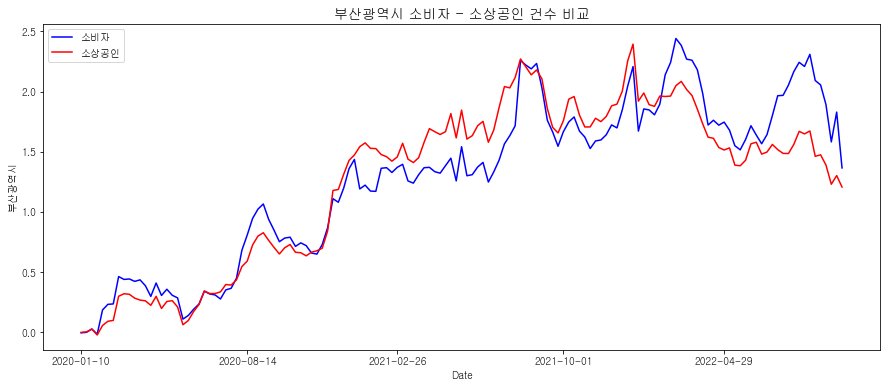

In [12]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '부산광역시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '부산광역시', color = 'red', ax=ax, data = small_count)

plt.title('부산광역시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

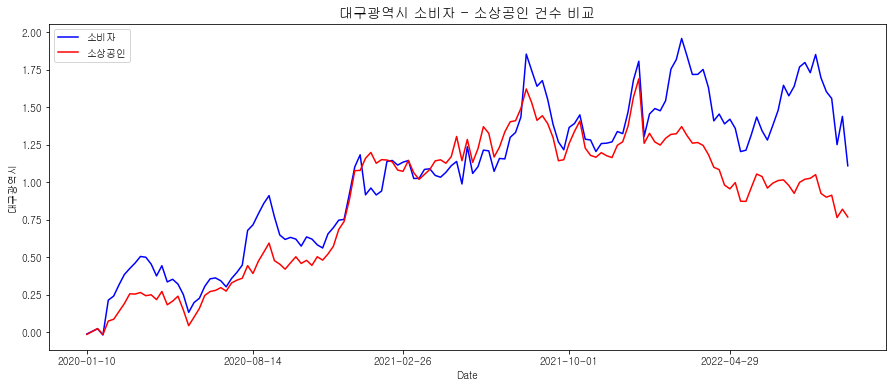

In [13]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '대구광역시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '대구광역시', color = 'red', ax=ax, data = small_count)

plt.title('대구광역시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

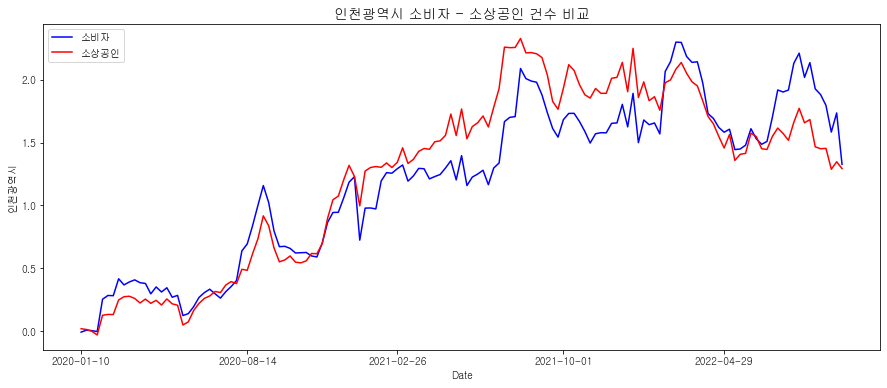

In [14]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '인천광역시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '인천광역시', color = 'red', ax=ax, data = small_count)

plt.title('인천광역시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

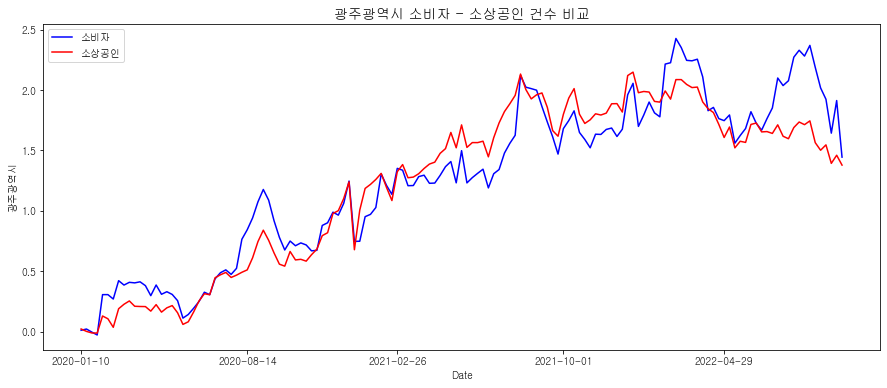

In [15]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '광주광역시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '광주광역시', color = 'red', ax=ax, data = small_count)

plt.title('광주광역시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

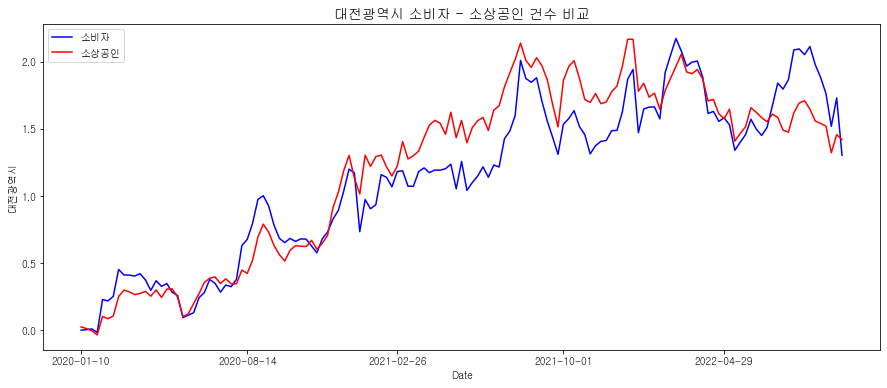

In [16]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '대전광역시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '대전광역시', color = 'red', ax=ax, data = small_count)

plt.title('대전광역시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

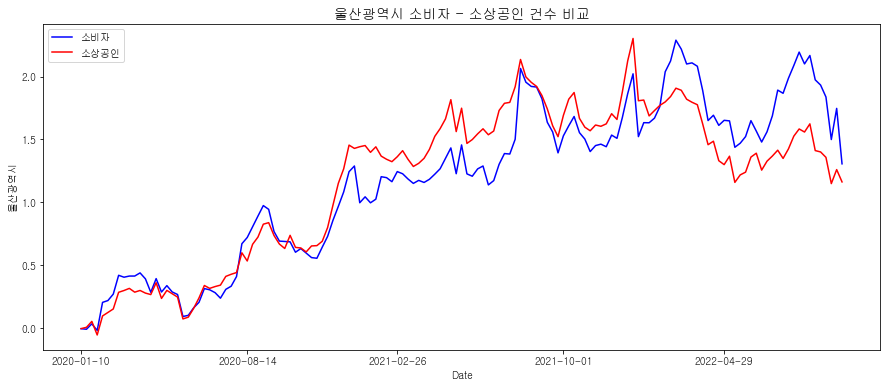

In [17]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '울산광역시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '울산광역시', color = 'red', ax=ax, data = small_count)

plt.title('울산광역시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

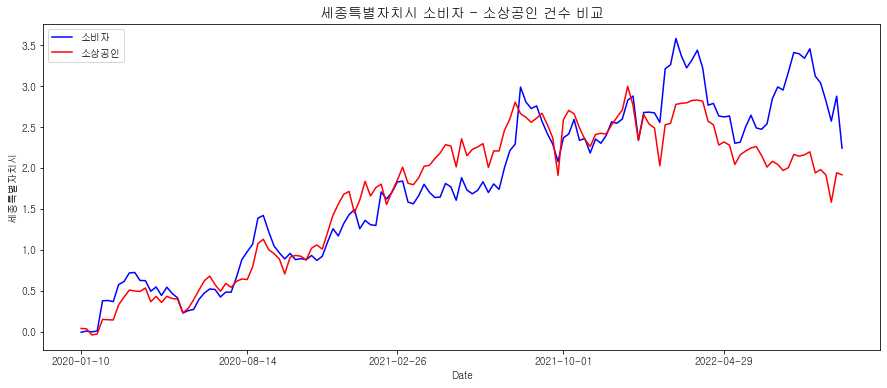

In [18]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '세종특별자치시', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '세종특별자치시', color = 'red', ax=ax, data = small_count)

plt.title('세종특별자치시 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

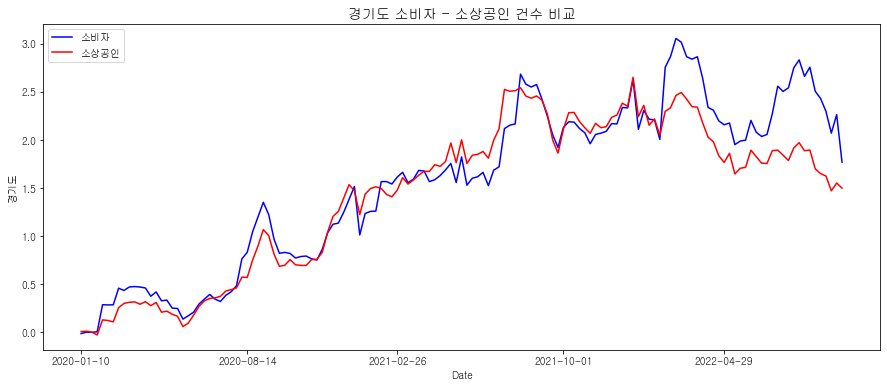

In [19]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '경기도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '경기도', color = 'red', ax=ax, data = small_count)

plt.title('경기도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

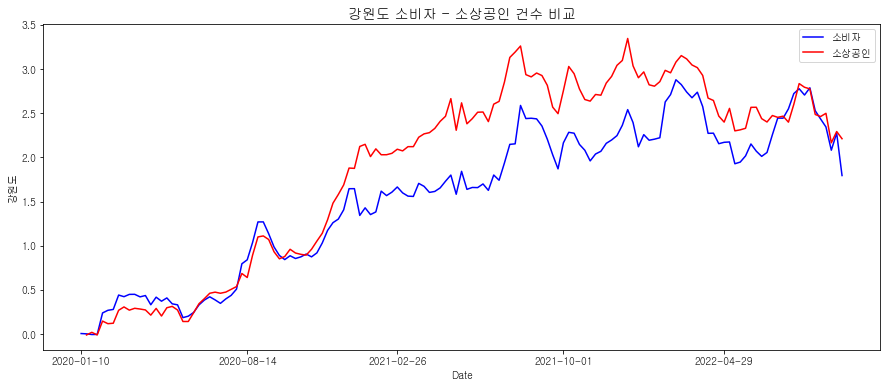

In [20]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '강원도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '강원도', color = 'red', ax=ax, data = small_count)

plt.title('강원도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

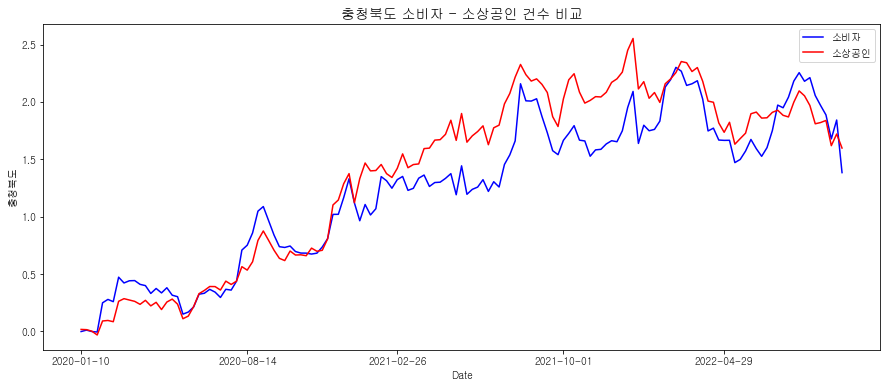

In [21]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '충청북도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '충청북도', color = 'red', ax=ax, data = small_count)

plt.title('충청북도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

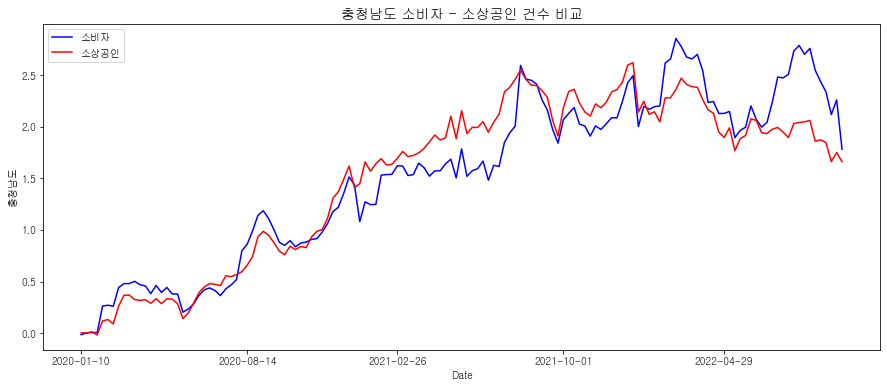

In [22]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '충청남도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '충청남도', color = 'red', ax=ax, data = small_count)

plt.title('충청남도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

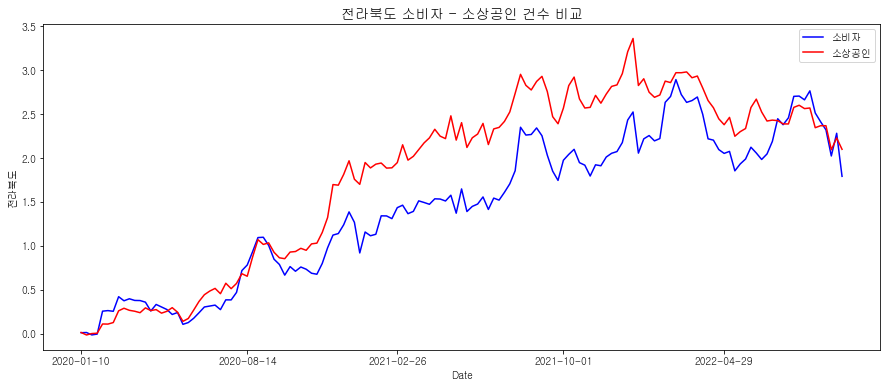

In [23]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '전라북도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '전라북도', color = 'red', ax=ax, data = small_count)

plt.title('전라북도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

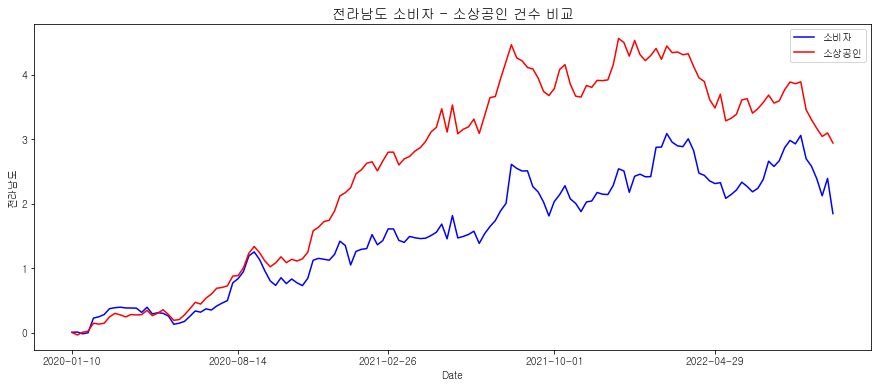

In [24]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '전라남도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '전라남도', color = 'red', ax=ax, data = small_count)

plt.title('전라남도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

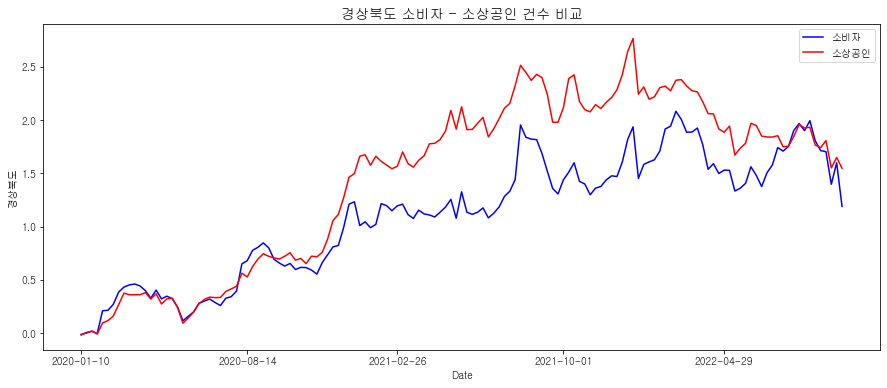

In [25]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '경상북도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '경상북도', color = 'red', ax=ax, data = small_count)

plt.title('경상북도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

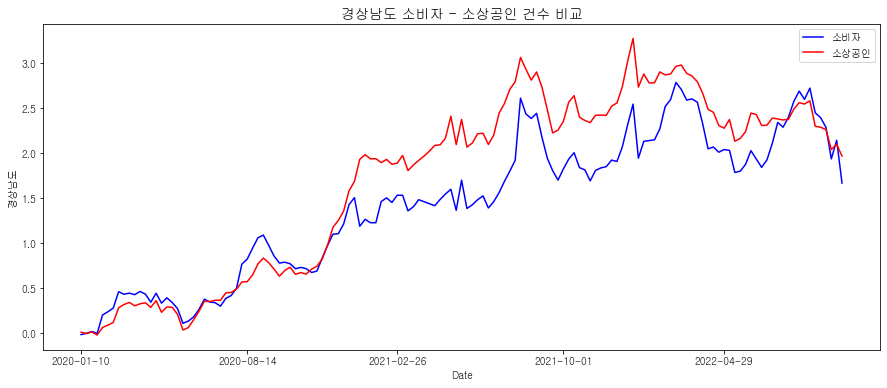

In [26]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '경상남도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '경상남도', color = 'red', ax=ax, data = small_count)

plt.title('경상남도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

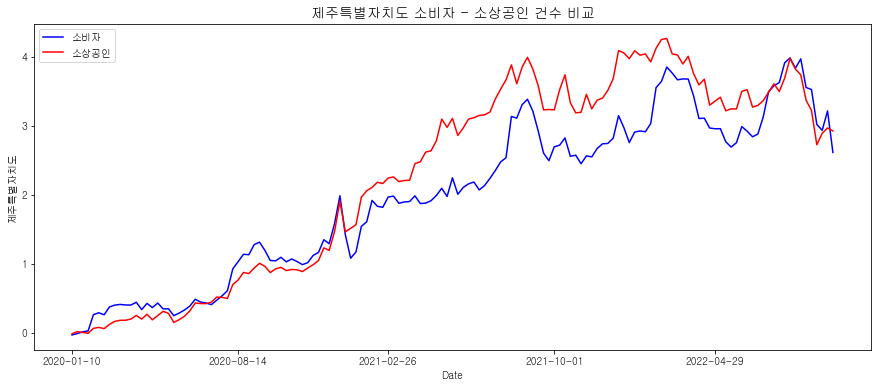

In [27]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '제주특별자치도', color = 'blue', ax=ax, data = consumer_count)
sns.lineplot(x = 'Date', y = '제주특별자치도', color = 'red', ax=ax, data = small_count)

plt.title('제주특별자치도 소비자 - 소상공인 건수 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

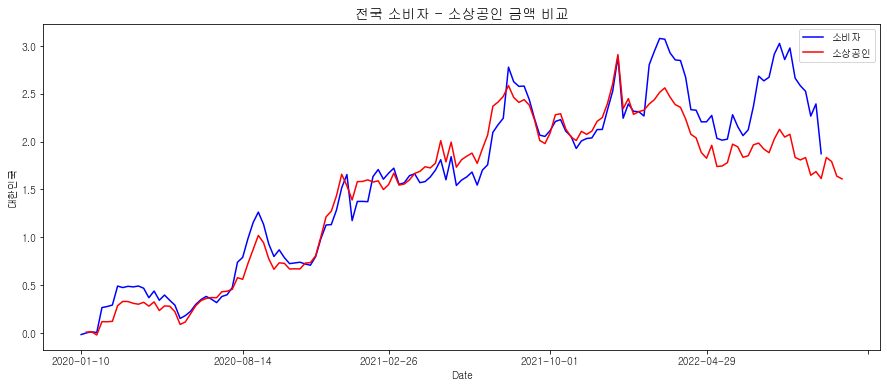

In [28]:
#################################### 1 전국 소비자 - 소상공인 금액비교 #####################################

fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '대한민국', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '대한민국', color = 'red', ax=ax, data = small_price)

plt.title('전국 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

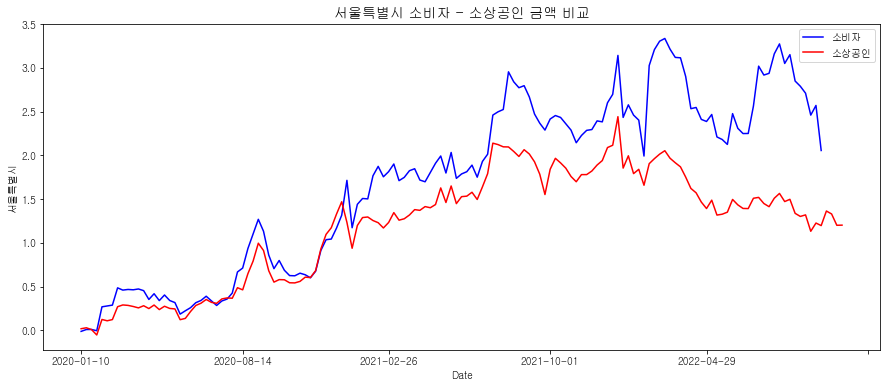

In [29]:
# 2
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '서울특별시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '서울특별시', color = 'red', ax=ax, data = small_price)

plt.title('서울특별시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

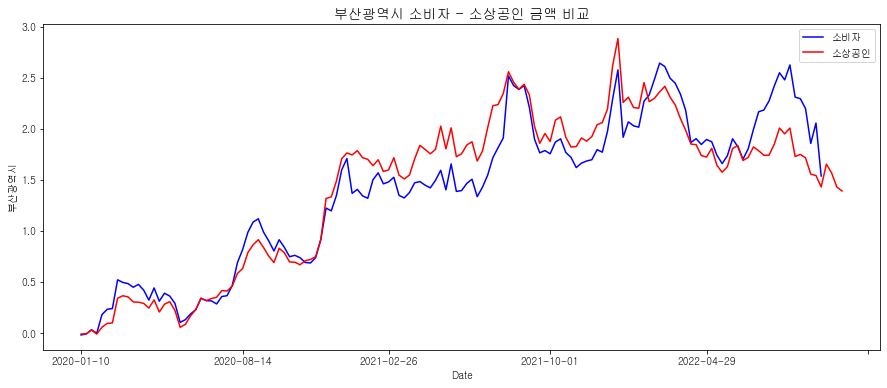

In [30]:
# 3
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '부산광역시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '부산광역시', color = 'red', ax=ax, data = small_price)

plt.title('부산광역시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

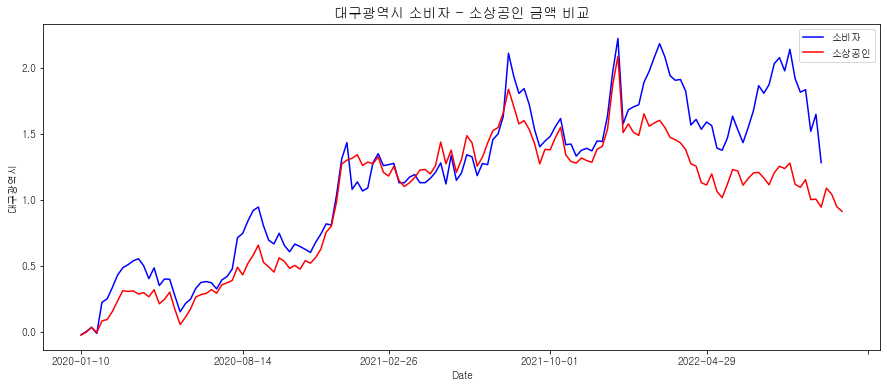

In [31]:
# 4
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '대구광역시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '대구광역시', color = 'red', ax=ax, data = small_price)

plt.title('대구광역시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

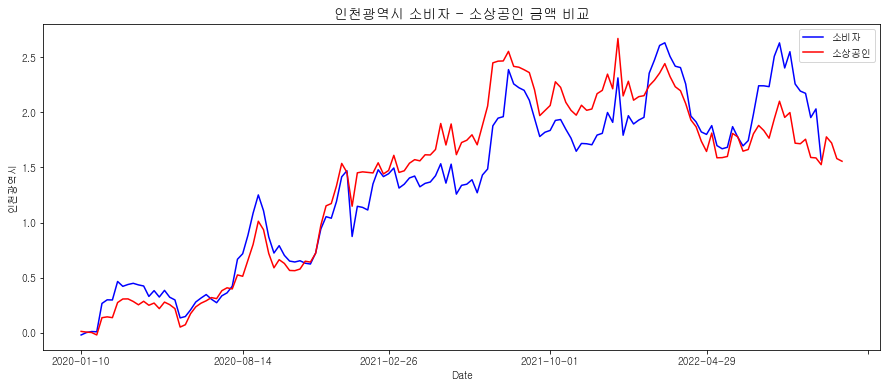

In [32]:
# 5
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '인천광역시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '인천광역시', color = 'red', ax=ax, data = small_price)

plt.title('인천광역시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

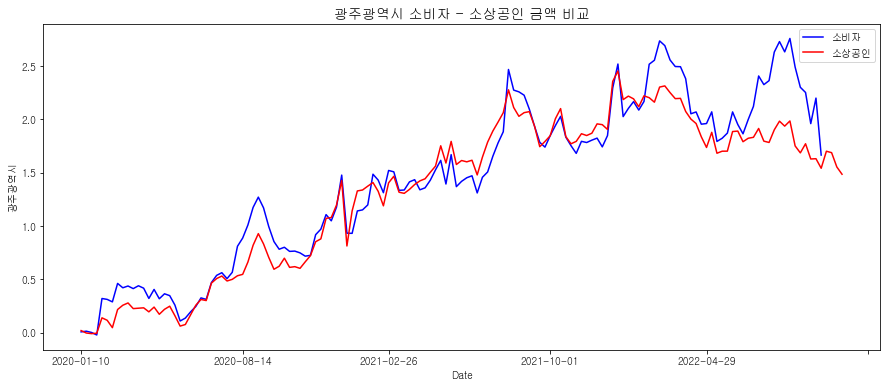

In [33]:
# 6
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '광주광역시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '광주광역시', color = 'red', ax=ax, data = small_price)

plt.title('광주광역시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

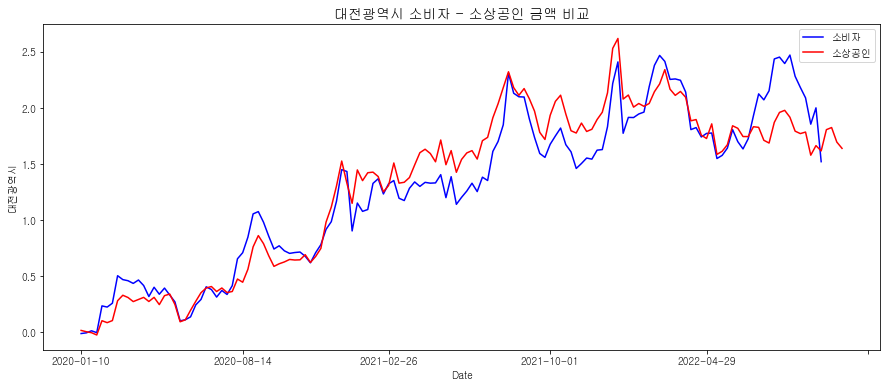

In [34]:
# 7
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '대전광역시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '대전광역시', color = 'red', ax=ax, data = small_price)

plt.title('대전광역시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

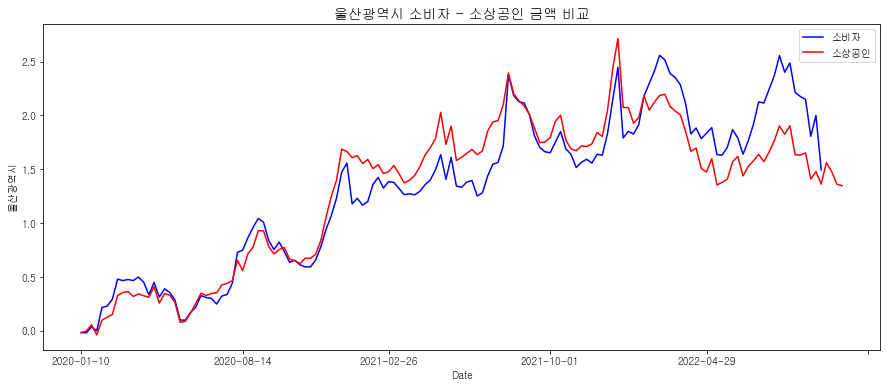

In [35]:
# 8
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '울산광역시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '울산광역시', color = 'red', ax=ax, data = small_price)

plt.title('울산광역시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

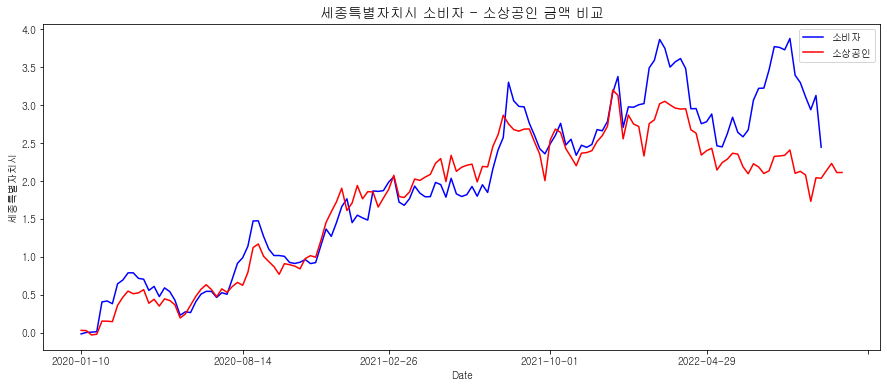

In [36]:
# 9
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '세종특별자치시', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '세종특별자치시', color = 'red', ax=ax, data = small_price)

plt.title('세종특별자치시 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

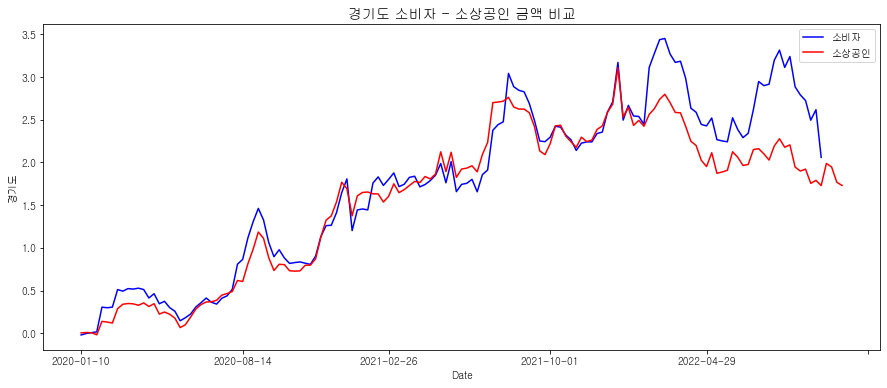

In [37]:
# 10
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '경기도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '경기도', color = 'red', ax=ax, data = small_price)

plt.title('경기도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

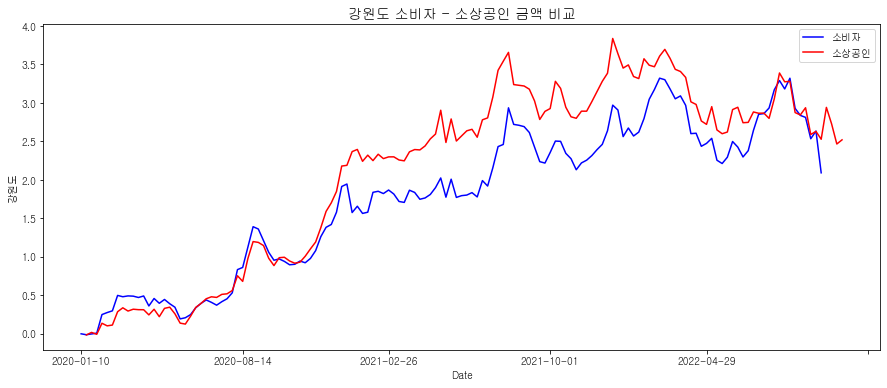

In [38]:
# 11
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '강원도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '강원도', color = 'red', ax=ax, data = small_price)

plt.title('강원도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

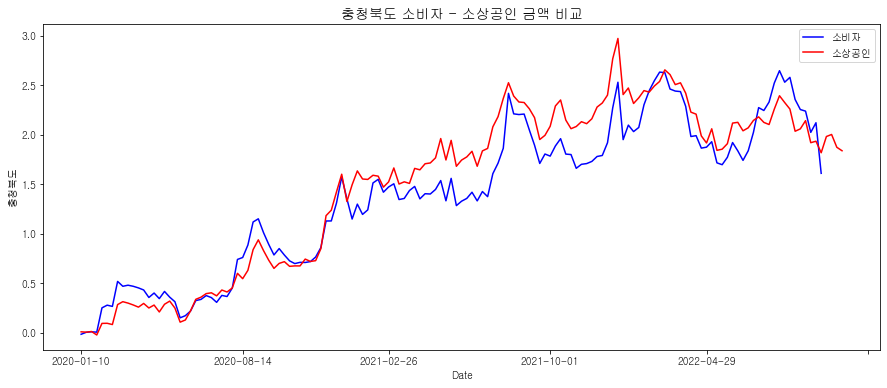

In [39]:
# 12
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '충청북도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '충청북도', color = 'red', ax=ax, data = small_price)

plt.title('충청북도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

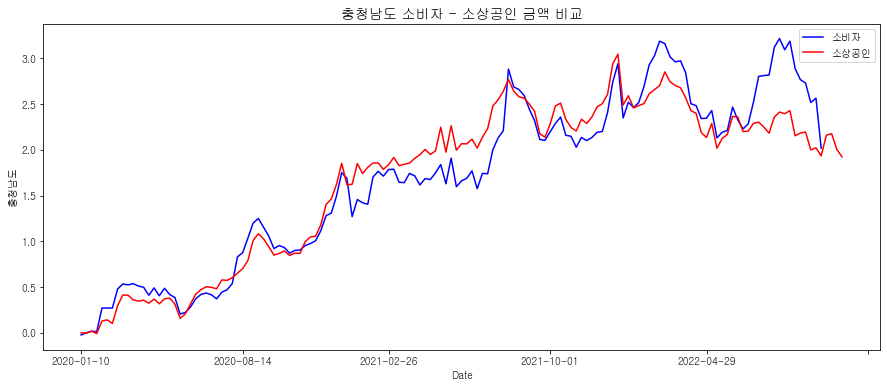

In [40]:
# 13
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '충청남도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '충청남도', color = 'red', ax=ax, data = small_price)

plt.title('충청남도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

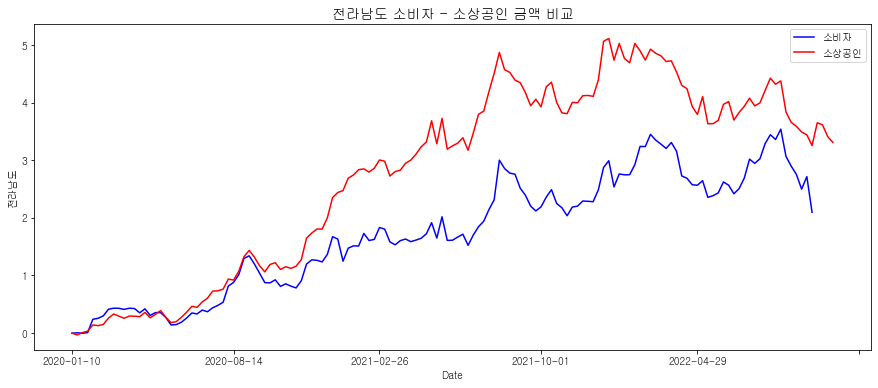

In [41]:
# 14
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '전라남도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '전라남도', color = 'red', ax=ax, data = small_price)

plt.title('전라남도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

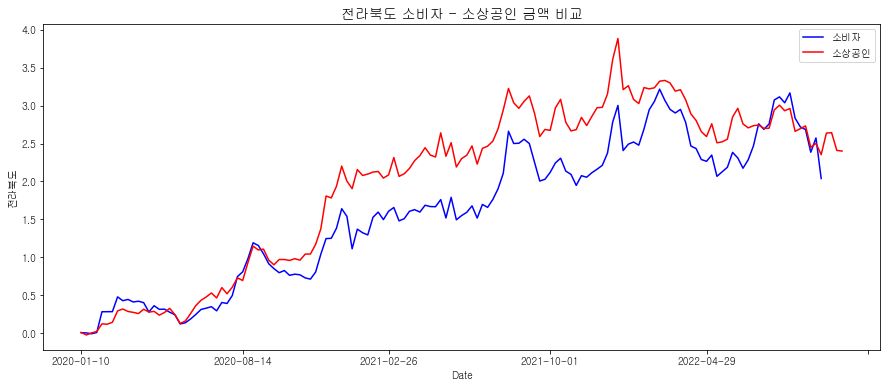

In [42]:
# 15
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '전라북도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '전라북도', color = 'red', ax=ax, data = small_price)

plt.title('전라북도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

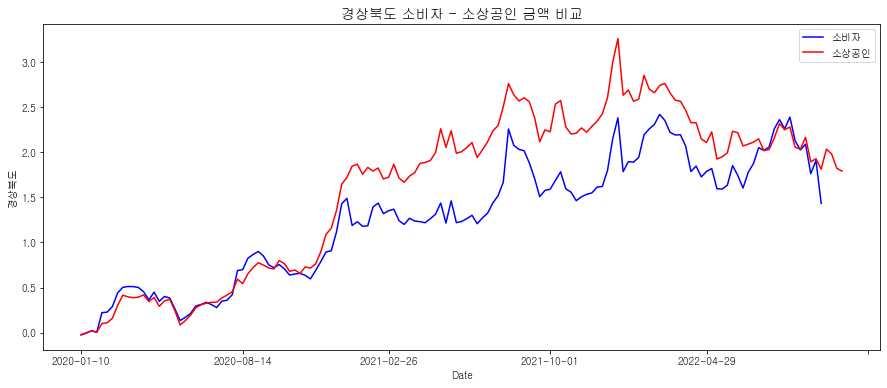

In [43]:
# 16
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '경상북도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '경상북도', color = 'red', ax=ax, data = small_price)

plt.title('경상북도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

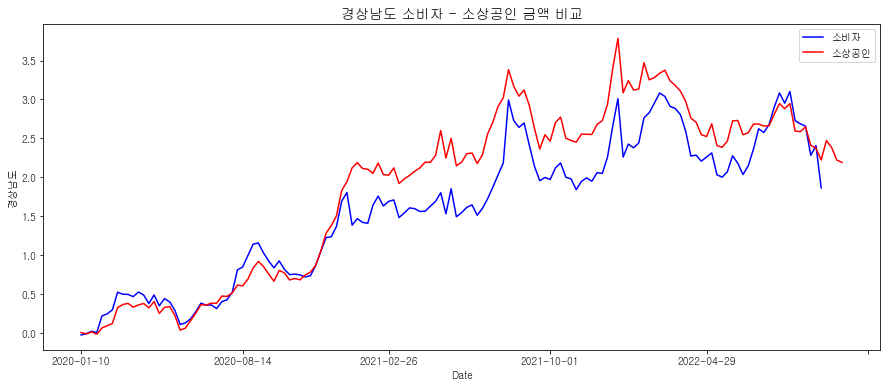

In [44]:
# 17
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '경상남도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '경상남도', color = 'red', ax=ax, data = small_price)

plt.title('경상남도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

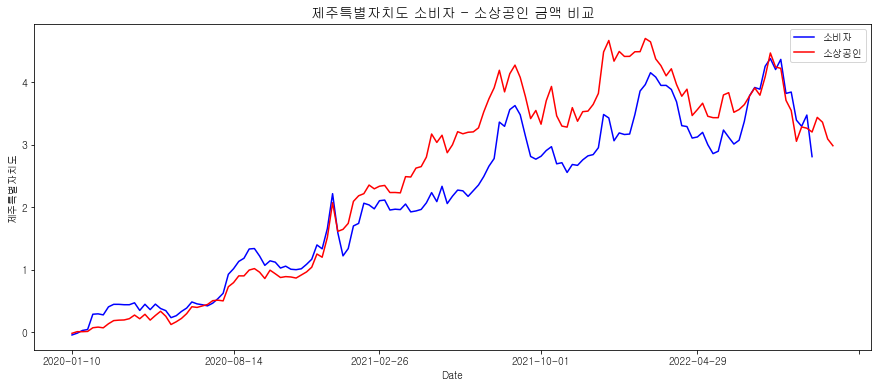

In [45]:
# 18
fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')

sns.lineplot(x = 'Date', y = '제주특별자치도', color = 'blue', ax=ax, data = consumer_price)
sns.lineplot(x = 'Date', y = '제주특별자치도', color = 'red', ax=ax, data = small_price)

plt.title('제주특별자치도 소비자 - 소상공인 금액 비교', fontsize= 14)
plt.legend(labels=["소비자","소상공인"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()